# Autoregressive model

This imports the PyTorch library, which we'll use for building and training neural networks.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

Generate a random sequence of 100 data points using NumPy (np.random.randn(100)) and convert it into a PyTorch tensor using torch.FloatTensor(data).

In [2]:
# Generate some sample data
np.random.seed(0)
data = np.random.randn(100)

In [3]:
# Convert data to PyTorch tensor
data = torch.FloatTensor(data)

Define a simple autoregressive model using PyTorch's neural network module (nn.Module). 
The model consists of a single linear layer (nn.Linear) that takes the previous input_size data points as input and predicts the next data point.



In [4]:
# Define the Autoregressive model
class AutoregressiveModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(AutoregressiveModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.linear = nn.Linear(input_size, hidden_size)
    
    def forward(self, x):
        output = self.linear(x)
        return output

In [5]:
# Hyperparameters
input_size = 1
hidden_size = 64
learning_rate = 0.001
num_epochs = 100

Here, we create an instance of the autoregressive model (model), define the loss function (criterion) as Mean Squared Error, and set up the optimizer (optimizer) as Adam optimizer with a specific learning rate.

In [7]:
# Initialize the model
model = AutoregressiveModel(input_size, hidden_size)

# Loss function and optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


This loop runs through num_epochs epochs and for each epoch, iterates over the data points. It prepares the input data (a window of previous data points), computes the model's output (prediction), calculates the loss between the predicted and actual data points, performs backpropagation to compute gradients, and updates the model's parameters using the optimizer.



In [8]:
# Train the model
for epoch in range(num_epochs):
    for i in range(input_size, len(data)):
        # Prepare input and target data
        input_data = data[i-input_size:i]
        target_data = data[i]
        
        # Forward pass
        output = model(input_data.unsqueeze(0))
        loss = criterion(output, target_data.unsqueeze(0))
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.2214
Epoch [20/100], Loss: 0.1532
Epoch [30/100], Loss: 0.1361
Epoch [40/100], Loss: 0.1313
Epoch [50/100], Loss: 0.1297
Epoch [60/100], Loss: 0.1292
Epoch [70/100], Loss: 0.1290
Epoch [80/100], Loss: 0.1289
Epoch [90/100], Loss: 0.1288
Epoch [100/100], Loss: 0.1288


Generate predictions for the data. 

The code iterates over the data points, prepares the input data, feeds it to the model to get the output (prediction), and appends the prediction to the predictions list.

In [10]:
# Generate predictions
predictions = []
with torch.no_grad():
    for i in range(input_size, len(data)):
        input_data = data[i-input_size:i]
        output = model(input_data.unsqueeze(0))
        predictions.append(output.squeeze().numpy())


Use matplotlib to plot the original data (blue) and the predictions made by the autoregressive model (red) against time. 

This visualization helps us understand how well the model is capturing the underlying patterns in the data.



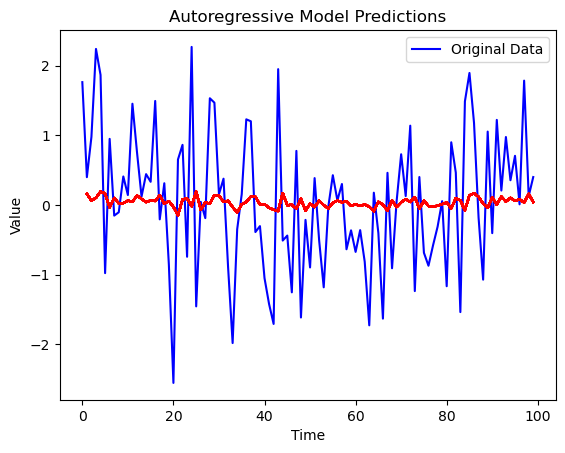

In [15]:
# Plotting
import matplotlib.pyplot as plt

plt.plot(data.numpy(), label='Original Data', color='blue')
plt.plot(range(input_size, len(data) - input_size + 1), predictions, color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Autoregressive Model Predictions')
plt.legend(['Original Data'])
plt.show()
